## Generar 300 números aleatorios

In [218]:
import pandas as pd
from random import random, randint

# 300 datos
datos = [str(randint(10000,99999)) for i in range(0,300)]

## Clasificar números generados

In [226]:
def patron(num):
    iguales = -5
    for i in range(0, 5):
        char1 = num[i]
        for j in range(0, 5):
            char2 = num[j]
            if char1 == char2:
                iguales = iguales+1
    
    return iguales

# aplicar la funcion `patron` a cada elemento de la lista `datos`
clasificacion = list(map(patron, datos))

data = pd.DataFrame({'Número': datos, 'Clasificación': clasificacion})

data.head()

,Clasificación,Número
0,0,76835
1,2,18514
2,4,81718
3,4,77044
4,0,78529


## Histograma

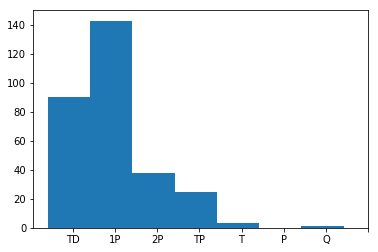

In [227]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks

freq, bins, _ = plt.hist(data['Clasificación'], bins=7)

locs, labels = xticks()

ticks = xticks(bins+1, ('TD', '1P', '2P', 'TP', 'T', 'P', 'Q'))

## Probabilidades, frecuencias esperadas y observadas 

In [228]:
tabla = pd.DataFrame()

cat = [
        'Todos diferentes (TD)', 
        'Exactamente un par (1P)', 
        'Dos pares (2P)',
        'Una tercia y un par (TP)',
        'Tercia (T)',
        'Póker (P)',
        'Quintilla (Q)'
]

probs = [.3024, .5040, .1080, .0090, .0720, .0045, .0001]
freq_esperada = [round(300*p, 4) for p in probs]

tabla['Categorías'] = cat
tabla['Frecuencia observada'] = freq
tabla['Probabilidad'] = probs
tabla['Frecuencia esperada'] = freq_esperada

tabla

,Categorías,Frecuencia observada,Probabilidad,Frecuencia esperada
0,Todos diferentes (TD),90.0,0.3024,90.72
1,Exactamente un par (1P),143.0,0.5040,151.20
2,Dos pares (2P),38.0,0.1080,32.40
3,Una tercia y un par (TP),25.0,0.0090,2.70
4,Tercia (T),3.0,0.0720,21.60
5,Póker (P),0.0,0.0045,1.35
6,Quintilla (Q),1.0,0.0001,0.03


## Calcular chi cuadrada

In [229]:
chi = []
for i in range(0,7):
    chi.append(((freq[i] - freq_esperada[i])**2)/freq_esperada[i])

tabla['Chi cuadrada'] = chi
chi_cal = sum(chi)
tabla

,Categorías,Frecuencia observada,Probabilidad,Frecuencia esperada,Chi cuadrada
0,Todos diferentes (TD),90.0,0.3024,90.72,0.005714
1,Exactamente un par (1P),143.0,0.5040,151.20,0.444709
2,Dos pares (2P),38.0,0.1080,32.40,0.967901
3,Una tercia y un par (TP),25.0,0.0090,2.70,184.181481
4,Tercia (T),3.0,0.0720,21.60,16.016667
5,Póker (P),0.0,0.0045,1.35,1.350000
6,Quintilla (Q),1.0,0.0001,0.03,31.363333


## Conclusiones

In [230]:
from scipy.stats import chi2

print('Chi cuadrada inversa:', round(chi2.isf(.05, 6), 4))
print('Chi cuadrada calculada:', chi_cal)

Chi cuadrada inversa: 12.5916
Chi cuadrada calculada: 234.329805996
